# Obtener datos del Filtrado F10N

In [11]:
import pandas as pd

In [12]:
exPlagas = pd.ExcelFile('D:/bibliografia de tesis/Datos/ConsolidadoPlagas_Instalacion_2019.xlsx')

In [13]:
dfPlagas = exPlagas.parse('2019')
dfPlagas.columns

Index(['Evaluador', 'Fecha', 'FUNDO', 'FILTRADO', 'TURNO', 'LOTE',
       'des_nivel1', 'des_nivel2', 'Caracteristica', 'Suma', 'Grado',
       'Promedio', 'Porcentaje'],
      dtype='object')

In [14]:
# Importando maplotlib
import matplotlib.pyplot as plt

In [15]:
from datetime import datetime

In [16]:
dfPlgLt = dfPlagas['FILTRADO'] == '10N' 
filtered_df = dfPlagas[dfPlgLt]
filtered_df = filtered_df[filtered_df['Fecha'] >= datetime.strptime('2019-01-01', '%Y-%m-%d')]
filtered_df = filtered_df.drop(['Evaluador','FUNDO','FILTRADO','TURNO', 'Grado', 'Promedio', 'Porcentaje'], axis = 1)

## Bemisia Tabaci
### N° HOJAS INFESTADAS

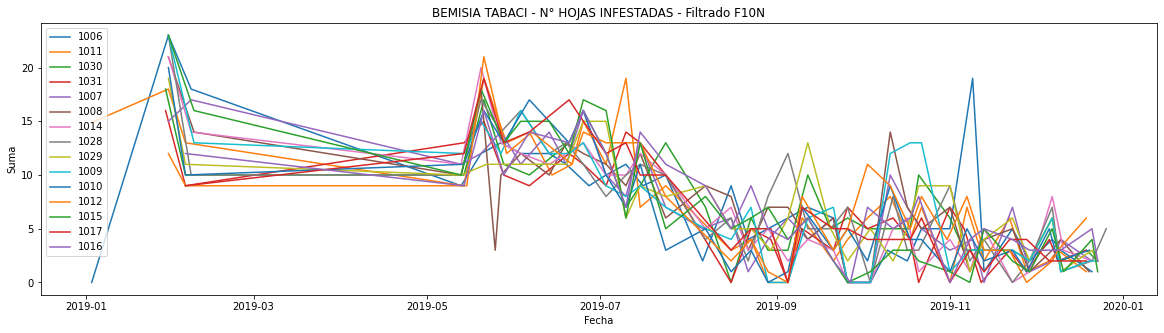

491

In [33]:
fl_df_Bemisia = filtered_df[filtered_df['des_nivel2'] == 'BEMISIA TABACI']
fl_df_Bemisia_HojInf = fl_df_Bemisia[fl_df_Bemisia['Caracteristica'] == 'N° HOJAS INFESTADAS']

# Listar lotes existentes
lotes = fl_df_Bemisia_HojInf.LOTE.unique()

for lote in lotes:
    fl_df_Bemisia_Lote = fl_df_Bemisia_HojInf[fl_df_Bemisia_HojInf['LOTE'] == lote]
    x = fl_df_Bemisia_Lote['Fecha']
    y = fl_df_Bemisia_Lote['Suma']    
    plt.figure('Single Plot',figsize=(20,5))

    plt.xlabel('Fecha')
    plt.ylabel('Suma')
    fx = plt.plot(x,y, label = lote)

plt.title("BEMISIA TABACI - N° HOJAS INFESTADAS - Filtrado F10N" )
plt.legend()
plt.show()
fl_df_Bemisia_HojInf.shape[0]
#fl_df_Bemisia_HojInf

In [ ]:
from flask import Flask, Response
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import io
app = Flask(__name__)

@app.route('/plot-png')
def plot_png():
    fig = create_figure()
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

def create_figure():
    fig = Figure(figsize=(30,10))
    axis = fig.add_subplot(1, 1, 1)
    axis.set_xlabel('Fecha')
    axis.set_ylabel('Suma')
    axis.set_title("BEMISIA TABACI - N° HOJAS INFESTADAS - Filtrado F10N")
   # axis.set_figsize(20,5)
#     xs = range(100)
#     ys = [random.randint(1, 50) for x in xs]
#     axis.plot(xs, ys)
    for lote in lotes:
        fl_df_Bemisia_Lote = fl_df_Bemisia_HojInf[fl_df_Bemisia_HojInf['LOTE'] == lote]
        x = fl_df_Bemisia_Lote['Fecha']
        y = fl_df_Bemisia_Lote['Suma']    

        #axis.xlabel('Fecha')
#         axis.ylabel('Suma')
        axis.plot(x,y, label = lote)
    return fig


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/May/2021 23:54:29] "GET /plot-png HTTP/1.1" 404 -
127.0.0.1 - - [04/May/2021 23:54:38] "GET /plot.png HTTP/1.1" 404 -
127.0.0.1 - - [04/May/2021 23:54:49] "GET /plot-png HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2021 23:55:26] "GET //plot-png HTTP/1.1" 200 -
